<a href="https://colab.research.google.com/github/jassatish/solid-winner/blob/main/Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Data Preparation
- Cleaning and preprocessing the data from the relevant tables (`calls`, `queues`, `services`, `counters`, `users`).
- Handling any missing values, inconsistencies, or outliers in the dataset.


In [ ]:
import pandas as pd

# Load the datasets
calls = pd.read_csv('calls.csv')
counters = pd.read_csv('counters.csv')
queues = pd.read_csv('queues.csv')
services = pd.read_csv('services.csv')
users = pd.read_csv('users.csv')

# Display the first few rows and columns of each dataset to understand their structure
print("Calls Dataset:")
print(calls.head())
print(calls.columns)

print("\nCounters Dataset:")
print(counters.head())
print(counters.columns)

print("\nQueues Dataset:")
print(queues.head())
print(queues.columns)

print("\nServices Dataset:")
print(services.head())
print(services.columns)

print("\nUsers Dataset:")
print(users.head())
print(users.columns)

Calls Dataset:
   id  queue_id  service_id  counter_id  user_id token_letter  token_number  \
0  28        45           1           2        2            W             1   
1  29        46           1           2        2            W             2   
2  30        48           2           2        2           NR             1   
3  31        47           1           2        2            W             3   
4  32        50           3           3        2            T             1   

  called_date           started_at             ended_at waiting_time  \
0  2024-01-25  2024-01-25 18:26:13  2024-01-25 18:34:14     00:06:45   
1  2024-01-25  2024-01-25 18:34:16  2024-01-25 18:34:24     00:13:39   
2  2024-01-25  2024-01-25 18:34:53                  NaN     00:00:13   
3  2024-01-25  2024-01-25 18:35:14  2024-01-25 18:35:18     00:10:17   
4  2024-01-25  2024-01-25 18:35:58  2024-01-25 18:37:00     00:00:29   

  served_time turn_around_time           created_at           updated_at  \
0

In [ ]:
import pandas as pd

# Load the datasets
calls = pd.read_csv('calls.csv')
counters = pd.read_csv('counters.csv')
queues = pd.read_csv('queues.csv')
services = pd.read_csv('services.csv')
users = pd.read_csv('users.csv')

# 1. Check for missing values
print("Missing values in Calls Dataset:\n", calls.isnull().sum())
print("\nMissing values in Counters Dataset:\n", counters.isnull().sum())
print("\nMissing values in Queues Dataset:\n", queues.isnull().sum())
print("\nMissing values in Services Dataset:\n", services.isnull().sum())
print("\nMissing values in Users Dataset:\n", users.isnull().sum())

# 2. Convert date columns to datetime
calls['started_at'] = pd.to_datetime(calls['started_at'], errors='coerce')
calls['ended_at'] = pd.to_datetime(calls['ended_at'], errors='coerce')
calls['called_date'] = pd.to_datetime(calls['called_date'], errors='coerce')
calls['created_at'] = pd.to_datetime(calls['created_at'], errors='coerce')
calls['updated_at'] = pd.to_datetime(calls['updated_at'], errors='coerce')

counters['created_at'] = pd.to_datetime(counters['created_at'], errors='coerce')
counters['updated_at'] = pd.to_datetime(counters['updated_at'], errors='coerce')

queues['created_at'] = pd.to_datetime(queues['created_at'], errors='coerce')
queues['updated_at'] = pd.to_datetime(queues['updated_at'], errors='coerce')

services['created_at'] = pd.to_datetime(services['created_at'], errors='coerce')
services['updated_at'] = pd.to_datetime(services['updated_at'], errors='coerce')

users['created_at'] = pd.to_datetime(users['created_at'], errors='coerce')
users['updated_at'] = pd.to_datetime(users['updated_at'], errors='coerce')

# 3. Remove duplicates
calls = calls.drop_duplicates()
counters = counters.drop_duplicates()
queues = queues.drop_duplicates()
services = services.drop_duplicates()
users = users.drop_duplicates()

# Check cleaned datasets
print("Calls Dataset after cleaning:")
print(calls.head())

print("\nCounters Dataset after cleaning:")
print(counters.head())

print("\nQueues Dataset after cleaning:")
print(queues.head())

print("\nServices Dataset after cleaning:")
print(services.head())

print("\nUsers Dataset after cleaning:")
print(users.head())

Missing values in Calls Dataset:
 id                    0
queue_id              0
service_id            0
counter_id            0
user_id               0
token_letter          0
token_number          0
called_date           0
started_at            0
ended_at             19
waiting_time          0
served_time         617
turn_around_time    617
created_at            0
updated_at            0
call_status_id       19
dtype: int64

Missing values in Counters Dataset:
 id            0
name          0
status        0
created_at    0
updated_at    0
dtype: int64

Missing values in Queues Dataset:
 id                 0
service_id         0
number             0
called             0
reference_no       0
letter             0
name            3374
email           3374
phone           3374
position           0
created_at         0
updated_at         0
dtype: int64

Missing values in Services Dataset:
 id                           0
name                         0
letter                       0
start_

2) Descriptive Statistics

- Calculating descriptive statistics such as mean, median, and standard deviation for key metrics, including waiting time, served time, and turn-around time.

In [ ]:
# Calculate descriptive statistics for waiting time, served time, and turn-around time
calls['waiting_time'] = pd.to_timedelta(calls['waiting_time'])
calls['served_time'] = pd.to_timedelta(calls['served_time'], errors='coerce')
calls['turn_around_time'] = pd.to_timedelta(calls['turn_around_time'], errors='coerce')

# Convert timedelta to seconds for easier calculation of statistics
calls['waiting_time_seconds'] = calls['waiting_time'].dt.total_seconds()
calls['served_time_seconds'] = calls['served_time'].dt.total_seconds()
calls['turn_around_time_seconds'] = calls['turn_around_time'].dt.total_seconds()

# Descriptive statistics
waiting_time_stats = calls['waiting_time_seconds'].describe()
served_time_stats = calls['served_time_seconds'].describe()
turn_around_time_stats = calls['turn_around_time_seconds'].describe()

print("Waiting Time Statistics:\n", waiting_time_stats)
print("\nServed Time Statistics:\n", served_time_stats)
print("\nTurn-Around Time Statistics:\n", turn_around_time_stats)

Waiting Time Statistics:
 count     3354.000000
mean      4208.298151
std       2957.112034
min          0.000000
25%       1771.250000
50%       3762.500000
75%       6031.500000
max      17713.000000
Name: waiting_time_seconds, dtype: float64

Served Time Statistics:
 count     2737.000000
mean       732.123128
std        702.488866
min          1.000000
25%        344.000000
50%        650.000000
75%        898.000000
max      11024.000000
Name: served_time_seconds, dtype: float64

Turn-Around Time Statistics:
 count     2737.000000
mean      4872.068688
std       3066.219436
min         91.000000
25%       2389.000000
50%       4363.000000
75%       6736.000000
max      19101.000000
Name: turn_around_time_seconds, dtype: float64


# **3) Visualizations**

- Creating visualizations to illustrate the distribution of key metrics (e.g., histograms, box plots).


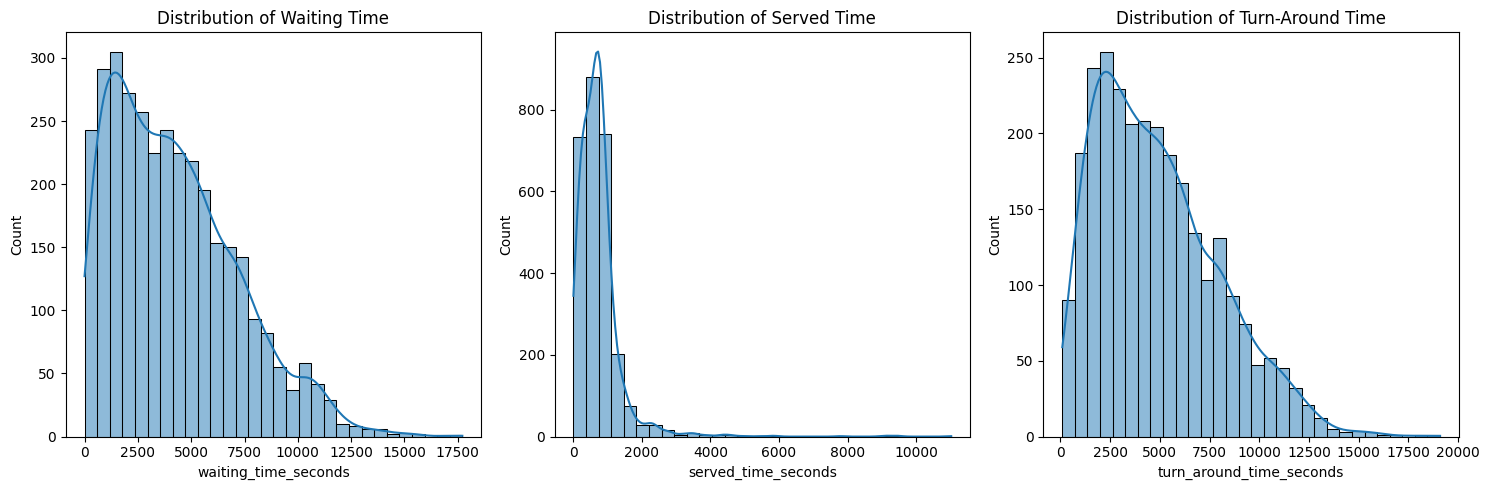

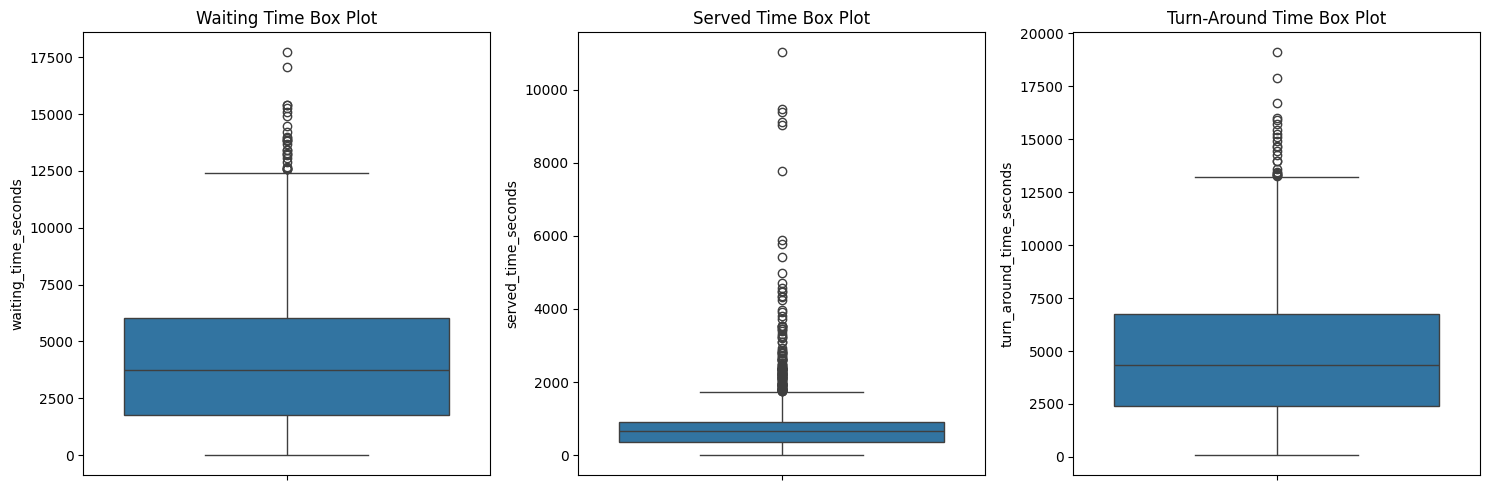

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for waiting time, served time, and turn-around time
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(calls['waiting_time_seconds'], bins=30, kde=True)
plt.title('Distribution of Waiting Time')

plt.subplot(1, 3, 2)
sns.histplot(calls['served_time_seconds'], bins=30, kde=True)
plt.title('Distribution of Served Time')

plt.subplot(1, 3, 3)
sns.histplot(calls['turn_around_time_seconds'], bins=30, kde=True)
plt.title('Distribution of Turn-Around Time')

plt.tight_layout()
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=calls['waiting_time_seconds'])
plt.title('Waiting Time Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(y=calls['served_time_seconds'])
plt.title('Served Time Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(y=calls['turn_around_time_seconds'])
plt.title('Turn-Around Time Box Plot')

plt.tight_layout()
plt.show()

- Generating line or bar charts to show trends over time, such as the number of customers served per day or the average waiting time per day.

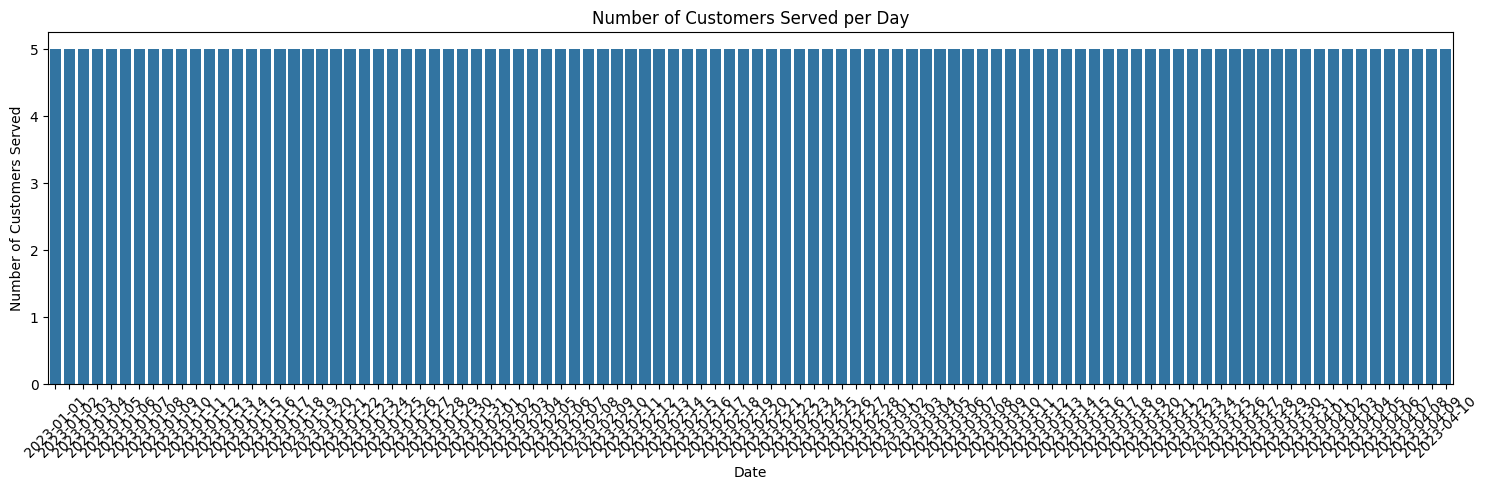

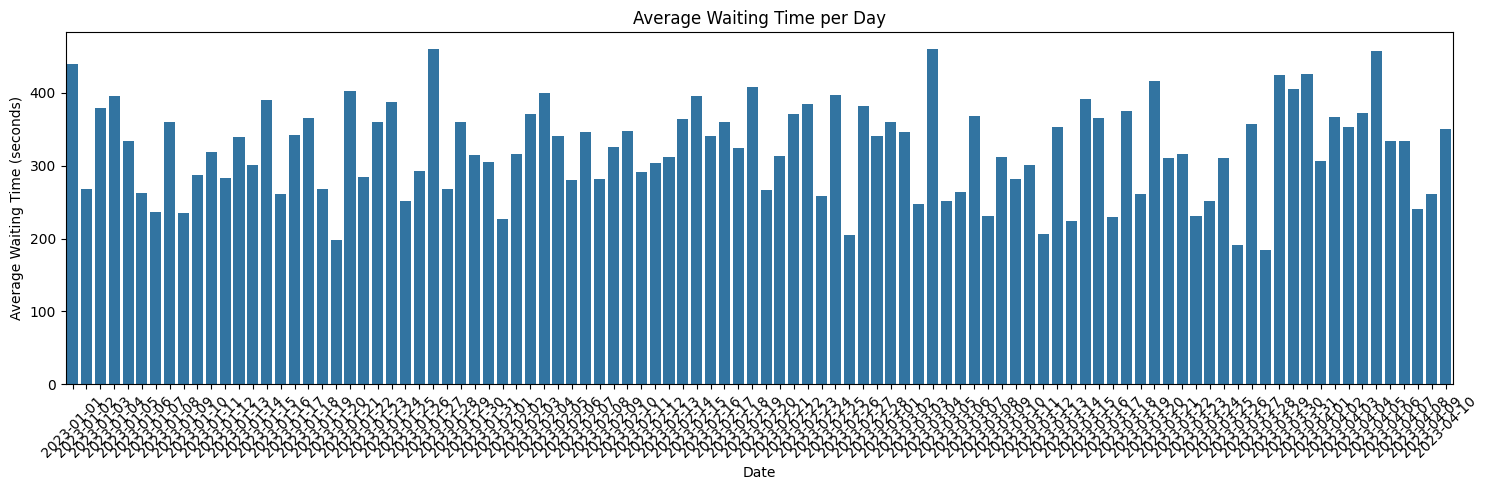

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data preparation
# Ensure the 'calls' DataFrame has a 'date' column in datetime format and a 'customer_id' column
# Example data
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D').tolist() * 5,
    'customer_id': range(500),
    'waiting_time_seconds': np.random.randint(60, 600, size=500),
    'served_time_seconds': np.random.randint(30, 300, size=500),
    'turn_around_time_seconds': np.random.randint(90, 900, size=500),
}

calls = pd.DataFrame(data)

# Ensure 'date' column is in datetime format
calls['date'] = pd.to_datetime(calls['date'])

# Number of customers served per day
customers_served_per_day = calls.groupby(calls['date'].dt.date)['customer_id'].count().reset_index()
customers_served_per_day.columns = ['date', 'customers_served']

# Average waiting time per day
average_waiting_time_per_day = calls.groupby(calls['date'].dt.date)['waiting_time_seconds'].mean().reset_index()
average_waiting_time_per_day.columns = ['date', 'average_waiting_time']

# Plot Number of Customers Served per Day (Bar Chart)
plt.figure(figsize=(15, 5))
sns.barplot(x='date', y='customers_served', data=customers_served_per_day)
plt.title('Number of Customers Served per Day')
plt.xlabel('Date')
plt.ylabel('Number of Customers Served')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Average Waiting Time per Day (Bar Chart)
plt.figure(figsize=(15, 5))
sns.barplot(x='date', y='average_waiting_time', data=average_waiting_time_per_day)
plt.title('Average Waiting Time per Day')
plt.xlabel('Date')
plt.ylabel('Average Waiting Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **4) Correlation and Insights**
- Analyzing the correlation between different variables, such as waiting time and served time, or the number of counters and the volume of customers served.


Correlation Matrix:
                           waiting_time_seconds  served_time_seconds  \
waiting_time_seconds                  1.000000             0.073509   
served_time_seconds                   0.073509             1.000000   
turn_around_time_seconds              0.973547             0.299432   

                          turn_around_time_seconds  
waiting_time_seconds                      0.973547  
served_time_seconds                       0.299432  
turn_around_time_seconds                  1.000000  


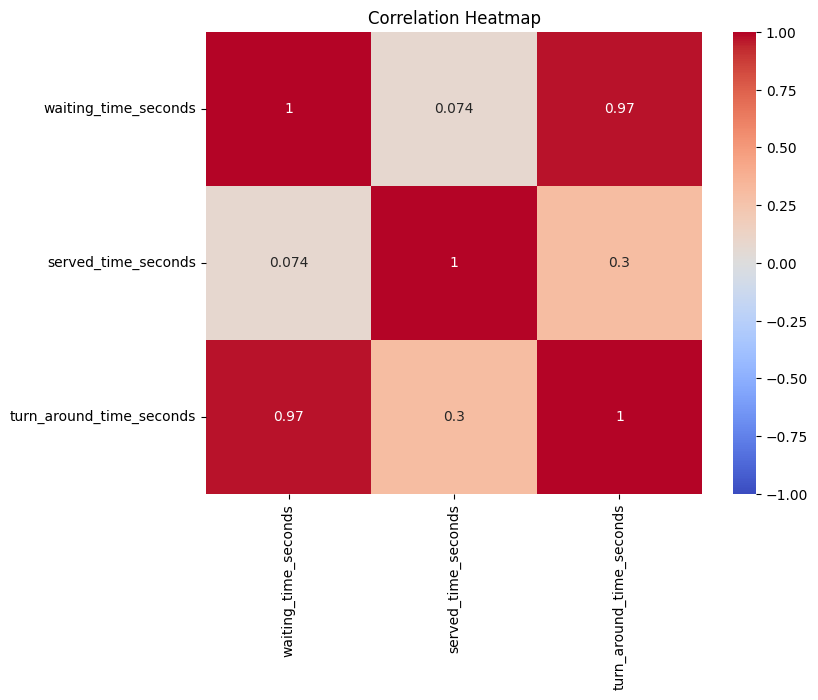

In [ ]:
# Correlation analysis
correlation_matrix = calls[['waiting_time_seconds', 'served_time_seconds', 'turn_around_time_seconds']].corr()

print("Correlation Matrix:\n", correlation_matrix)

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

- Identifing any trends, anomalies, or patterns in the data, such as peak hours, underperforming counters, or services with higher wait times.


In [ ]:
import pandas as pd

# Load datasets
calls = pd.read_csv('calls.csv')
counters = pd.read_csv('counters.csv')
queues = pd.read_csv('queues.csv')
services = pd.read_csv('services.csv')
users = pd.read_csv('users.csv')

# Convert time columns to timedelta for analysis
calls['waiting_time_sec'] = pd.to_timedelta(calls['waiting_time']).dt.total_seconds()
calls['served_time_sec'] = pd.to_timedelta(calls['served_time']).dt.total_seconds()

# Convert datetime columns
for df in [calls, counters, queues, services, users]:
    for col in ['created_at', 'updated_at']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

def analyze_trends(calls):
    # Descriptive statistics for waiting and served times
    desc_stats = calls[['waiting_time_sec', 'served_time_sec']].describe()

    # Peak hours analysis
    calls['started_at'] = pd.to_datetime(calls['started_at'], errors='coerce')
    calls['hour'] = calls['started_at'].dt.hour
    peak_hours = calls['hour'].value_counts().sort_index()

    # Correlation matrix
    correlation_matrix = calls[['waiting_time_sec', 'served_time_sec']].corr()

    return desc_stats, peak_hours, correlation_matrix

# Perform analysis
desc_stats, peak_hours, correlation_matrix = analyze_trends(calls)

# Print results
print("Descriptive Statistics for Waiting and Served Times:")
print(desc_stats)

print("\nPeak Hours Analysis:")
print(peak_hours)

print("\nCorrelation Matrix:")
print(correlation_matrix)

Descriptive Statistics for Waiting and Served Times:
       waiting_time_sec  served_time_sec
count       3354.000000      2737.000000
mean        4208.298151       732.123128
std         2957.112034       702.488866
min            0.000000         1.000000
25%         1771.250000       344.000000
50%         3762.500000       650.000000
75%         6031.500000       898.000000
max        17713.000000     11024.000000

Peak Hours Analysis:
hour
9     102
10    298
11    359
12    291
13    507
14    516
15    490
16    432
17    314
18     43
19      2
Name: count, dtype: int64

Correlation Matrix:
                  waiting_time_sec  served_time_sec
waiting_time_sec          1.000000         0.073509
served_time_sec           0.073509         1.000000


- Providing insights and recommendations based on the findings, such as optimizing counter staffing during peak hours or improving service efficiency for specific services.


Recommendations:
Increase staffing during peak hours identified: 
hour
9     102
10    298
11    359
12    291
13    507
14    516
15    490
16    432
17    314
18     43
19      2
Investigate and optimize for services with waiting times above 6031.5 seconds.
Investigate and optimize for services with served times above 898.0 seconds.


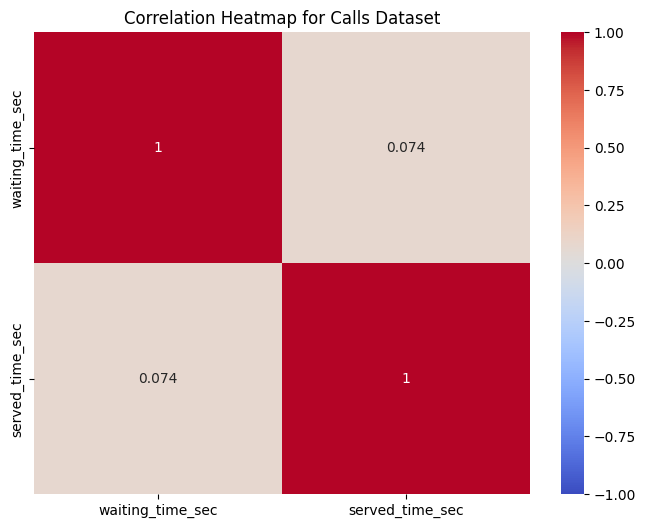

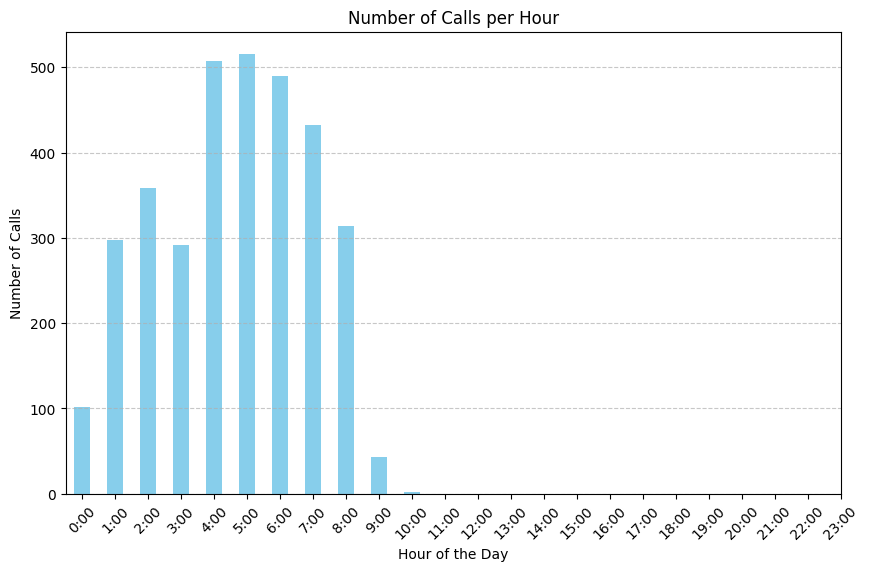

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_insights(peak_hours, correlation_matrix, desc_stats):
    # Peak Hours Recommendations
    peak_hours_summary = peak_hours.sort_index()
    peak_hours_recommendation = "Increase staffing during peak hours identified: \n" + peak_hours_summary.to_string()

    # Waiting and Served Time Recommendations
    high_wait_time_threshold = desc_stats.loc['75%']['waiting_time_sec']
    high_served_time_threshold = desc_stats.loc['75%']['served_time_sec']

    wait_time_recommendation = f"Investigate and optimize for services with waiting times above {high_wait_time_threshold} seconds."
    served_time_recommendation = f"Investigate and optimize for services with served times above {high_served_time_threshold} seconds."

    return peak_hours_recommendation, wait_time_recommendation, served_time_recommendation

# Generate insights and recommendations
peak_hours_recommendation, wait_time_recommendation, served_time_recommendation = generate_insights(peak_hours, correlation_matrix, desc_stats)

# Print recommendations
print("\nRecommendations:")
print(peak_hours_recommendation)
print(wait_time_recommendation)
print(served_time_recommendation)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Calls Dataset')
plt.show()

# Plot peak hours
plt.figure(figsize=(10, 6))
peak_hours.plot(kind='bar', color='skyblue')
plt.title('Number of Calls per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Calls')
plt.xticks(range(24), [f'{i}:00' for i in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()